# Laboratorio #4: Procesamiento de Imágenes a Color

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

##  2. Procesamiento Básico de Imágenes a Color

 1. Cargar la imagen a color (belka-strelka.png) en el entorno de trabajo en formato de arreglo de Numpy. Mostrar la
 imagen a color cargada.

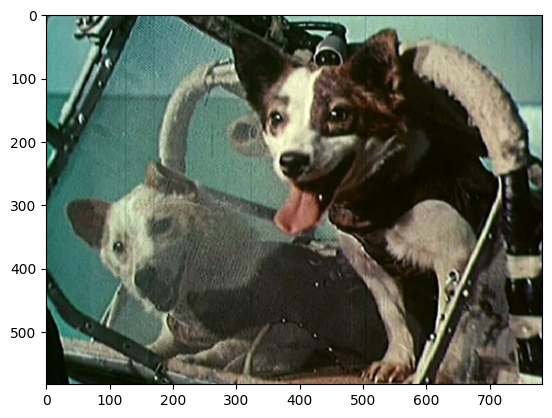

In [42]:
belka_strelka= Image.open('belka-strelka.png')
belka_strelka_np=np.array(belka_strelka)

plt.imshow(belka_strelka_np)
plt.show()

2. Mostrar las bandas de color individuales (Rojo, Verde y Azul). Utilizar subfiguras (plt.subplot()) para visualizar cada
 canal en escala de grises, representando la intensidad de cada canal.

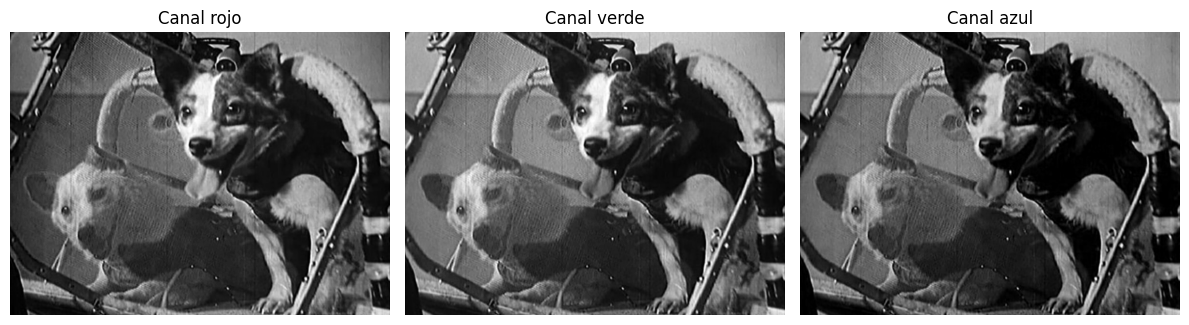

In [60]:
rojo= belka_strelka_np[:, :, 0]
verde= belka_strelka_np[:, :, 1]
azul= belka_strelka_np[:, :, 2]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(rojo, cmap='gray')
plt.title('Canal rojo')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(verde, cmap='gray')
plt.title('Canal verde')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(azul, cmap='gray')
plt.title('Canal azul')
plt.axis('off')

plt.tight_layout()
plt.show()

 3. Crear una nueva imagen RGB intercambiando los canales rojo y azul de la imagen original. Mostrar la nueva imagen al
 lado de la imagen original para comparar visualmente los efectos del intercambio de canales. Comente sus observaciones
 sobre las diferencias observadas.

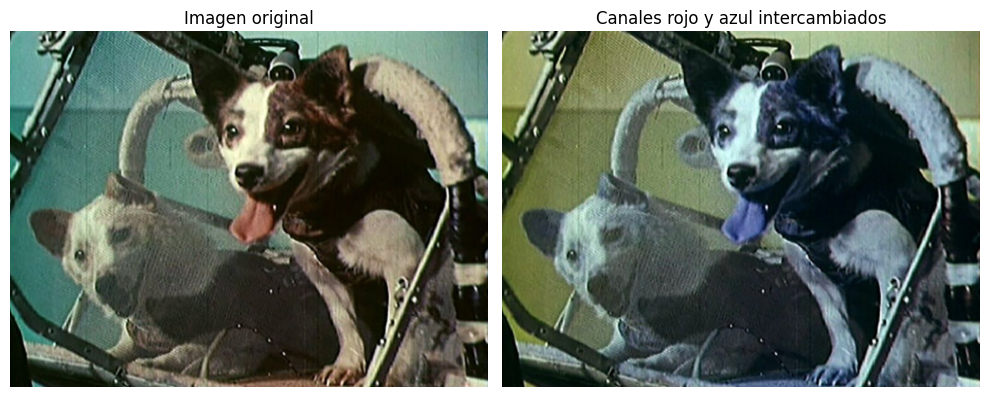

In [59]:

intercambio_r_a = belka_strelka_np.copy()
intercambio_r_a[:, :, 0]=belka_strelka_np[:, :, 2]
intercambio_r_a[:, :, 2]=belka_strelka_np[:, :, 0]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(belka_strelka_np)
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(intercambio_r_a)
plt.title('Canales rojo y azul intercambiados')
plt.axis('off')

plt.tight_layout()
plt.show()


* se puede observar como las partes de la imagen que antes eran azules ahora son rojas y como las que antes eran rojas ahora son azules y como las combinaciones que antes eran rojo-verde y azul-verde cambiaron de color.

4. En la imagen original, reemplazar el canal Azul con un arreglo completamente lleno de valores 255. Utilizar. Graficar la
 nueva imagen RGB y discutir sus observaciones resultantes de este cambio.

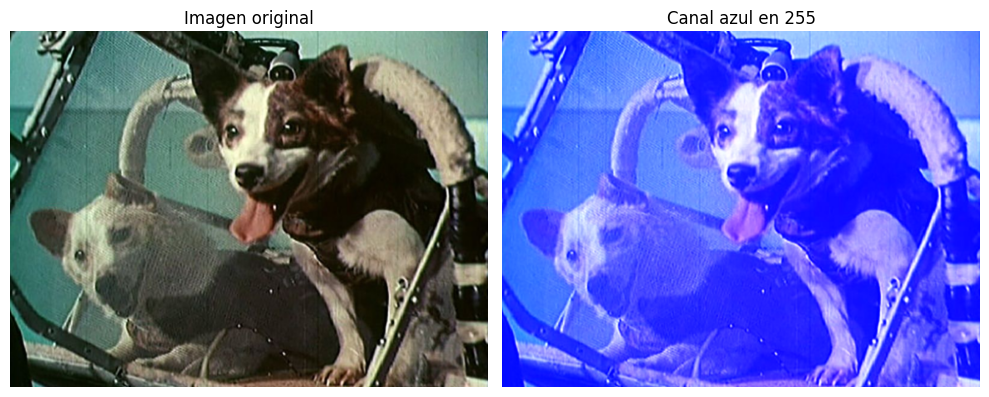

In [58]:
azul_255= belka_strelka_np.copy()
azul_255[:, :, 2] = 255

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(belka_strelka_np)
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(azul_255)
plt.title('Canal azul en 255')
plt.axis('off')

plt.tight_layout()
plt.show()


* al elevar al maximo los valores del canal azul los colores azules ahora son mas azules y las combinaciones que tenian azul cambiaron de color 

5. Calcular la intensidad media de cada banda de color utilizando numpy.mean() sobre los canales respectivos.

In [52]:
intensidad_roja= np.mean(belka_strelka_np[:, :, 0])
intensidad_verde= np.mean(belka_strelka_np[:, :, 1])
intensidad_azul= np.mean(belka_strelka_np[:, :, 2])

print(f"Intensidad media - Rojo: {intensidad_roja:.2f}, Verde: {intensidad_verde:.2f}, Azul: {intensidad_azul:.2f}")


Intensidad media - Rojo: 82.42, Verde: 91.03, Azul: 77.02


6. Aumentar la el brillo de cada canal, multiplicando sus respectivos valores por un factor que eleve la intensidad promedio
 de cada canal en un 20%. Aplicar este ajuste a cada canal de la imagen y graficar la imagen a color resultante. Comente
 sobre las diferencias observadas con respecto a la imagen original.

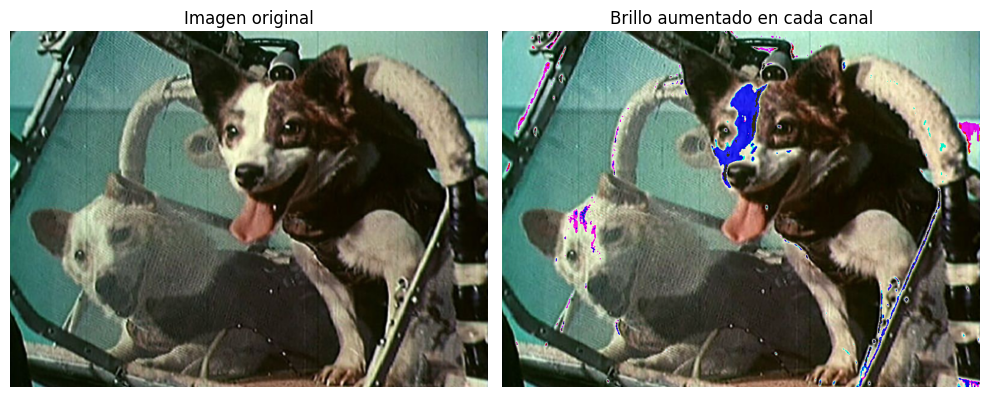

In [57]:
imagen_aumentada = belka_strelka_np.copy()
imagen_aumentada[:, :, 0] = belka_strelka_np[:, :, 0] * 1.2
imagen_aumentada[:, :, 1] = belka_strelka_np[:, :, 1] * 1.2
imagen_aumentada[:, :, 2] = belka_strelka_np[:, :, 2] * 1.2

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(belka_strelka_np)
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_aumentada)
plt.title('Brillo aumentado en cada canal')
plt.axis('off')

plt.tight_layout()
plt.show()

* ahora cada canal es un 20% mas intenso esto probocó que algunos pixeles se saturaran haciendo que algo de la información de la imagen se perdiera

 7. Repetir el ajuste de intensidad utilizando un único valor medio calculado para los tres canales RGB, de modo que la inten
sidad promedio de sus pixeles sea un 20% mayor al de la imagen original. Este paso centraliza el ajuste de brillo basado en
 la intensidad global promedio. Mostrar la imagen ajustada y compararla con la versión que tiene ajustes individuales por
 canal. Comente sobre cualquier diferencia resultante de hacer el ajuste de brillo a una imagen de de manera uniforme en
 sus 3 canales en comparación a realizar el ajuste por canal individual.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


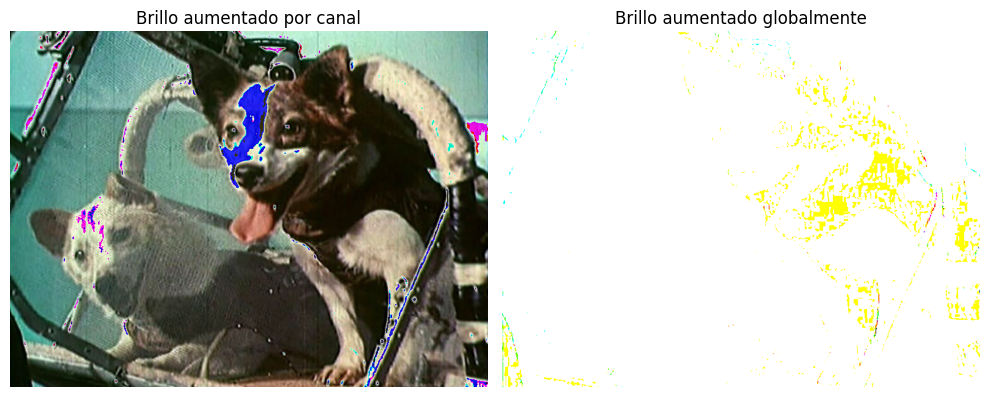

In [80]:
mean_global = np.mean(belka_strelka_np)
new_mean_global = mean_global * 1.2
factor_global = new_mean_global / mean_global
img_rgb_bright_global =belka_strelka_np * factor_global

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(imagen_aumentada)
plt.title('Brillo aumentado por canal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_rgb_bright_global)
plt.title('Brillo aumentado globalmente')
plt.axis('off')

plt.tight_layout()
plt.show()


* En la primera imagen se ve como unos cuantos pixeles se saturarón, pero en la segunda la gran mayoria de los pixeles se terminaron saturando, aunque el resultado me produce algo de desconfia.

 ## 2.1. Segmentación por Color

Defina una función segmentacion_color_dominante(x), que produzca una imagen a color donde cada pixel
 muestre un valor de 255 para el color dominante en el pixel correspondiente en la imagen original, y 0 para los otros
 dos colores. Por ejemplo, si un pixel en la imagen original tiene los valores RGB [112,92,15], la imagen producida por la
 función para ese mismo pixel debe tener el valor [255,0,0]. Utilice su criterio propio para lidiar con cualquier condición
 especial.

In [81]:
import numpy as np

def segmentacion_color_dominante(x):
    imagen_segmentada = np.zeros_like(x)
    
    max_indices = np.argmax(x, axis=2)
    
    for i in range(3):
        imagen_segmentada[:, :, i] = np.where(max_indices == i, 255, 0)
    
    return imagen_segmentada


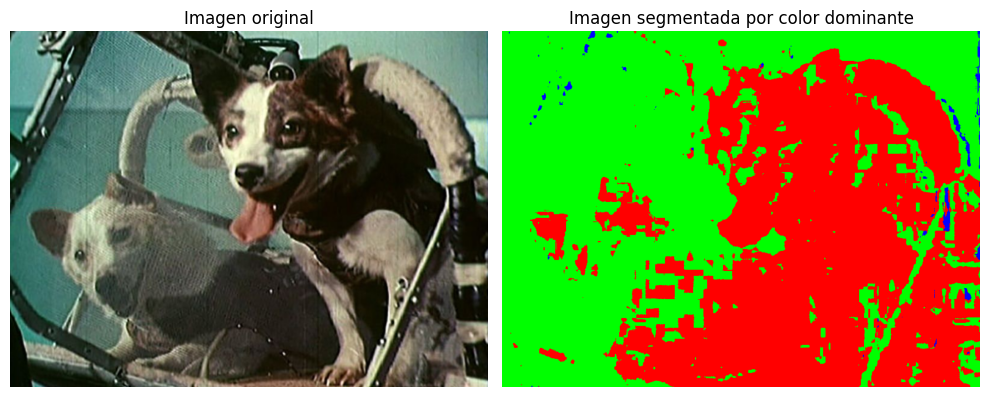

In [82]:
imagen_segmentada = segmentacion_color_dominante(belka_strelka_np)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(belka_strelka_np)
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_segmentada)
plt.title('Imagen segmentada por color dominante')
plt.axis('off')

plt.tight_layout()
plt.show()